## CIFAR Using CNN 

#### Ahmad Pouramini, Benyamin Hosseini 

---



This is the implementatin of CIFAR using CNN.

Source: https://blog.plon.io/tutorials/cifar-10-classification-using-keras-tutorial/

Other Sources: https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/

Question PDF: https://drive.google.com/open?id=1sySPwALk8alK38ejbjCoN5fS_YSHaBPs


## Loading Data

Found GPU at:/device:GPU:0


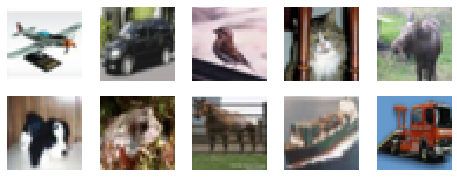

In [10]:
# Import all modules
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
# from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

# GPU Processing
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at:{}'.format(device_name))

batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 #
# epochs = 100 # repeat 100 times

(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1)
# x_train - training data(images), y_train - labels(digits)

# Print figure with 10 random images from each
 
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
#   ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


## Data Normalization

In [0]:
# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
#y_valid = np_utils.to_categorical(y_valid, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_valid = x_valid.astype('float32')
x_train  /= 255
x_test /= 255
#x_valid /= 255


## Creating the base model

In [0]:
# Based on:
# github.com/abhijeet3922/Object-recognition-CIFAR-10/blob/master/cifar10.py

def base_model():  # 3 Convolutional layers + 1 hidden layer MLP
    model = Sequential()
   
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))  # first layer filters: 32 filters 3x3
    #model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), activation='relu'))  # second layer filters: 32 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # second layer pooling: max pooling 2x2

    model.add(Conv2D(64, (3, 3), activation='relu'))  # third layer filters: 64 filters 3x3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # third layer pooling: max pooling 2x2

    # MLP
    model.add(Flatten())
    #model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu',kernel_constraint=maxnorm(3)))  # MLP first hidden layer neurons
    #model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))  # MLP output layer neurons
    
    epochs = 25 
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, decay=decay, momentum=0.9, nesterov=False)  # sigmoid optimizer

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

## The model summary

In [13]:
cnn_n = base_model()
cnn_n.summary()

# visualize model

# from keras_ascii_sequential import sequential_model_to_ascii_printout 

# sequential_model_to_ascii_printout(cnn_n)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 30, 30)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 13, 13)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 6, 6)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1180160   
__________

## Training the Model

In [14]:
epochs = 25
# cnn = cnn_n.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=epochs, batch_size=32)
# scores = cnn_n.evaluate(x_test,y_test,verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))
#test_loss, test_acc = cnn_n.evaluate(x_test,y_test)
cnn = cnn_n.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)
#print("epochs:", epochs, " batch size:", batch_size)
#cnn = cnn_n.fit(x_train[:], y_train[:], 
                #batch_size=100, epochs=50, 
                #validation_data=(x_test[:],y_test[:]),
                #shuffle=True)




Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 19s 382us/step - loss: 1.5448 - acc: 0.4401 - val_loss: 1.2280 - val_acc: 0.5606
Epoch 2/25
50000/50000 [==============================] - 19s 376us/step - loss: 1.0989 - acc: 0.6101 - val_loss: 0.9919 - val_acc: 0.6558
Epoch 3/25
50000/50000 [==============================] - 19s 380us/step - loss: 0.8719 - acc: 0.6956 - val_loss: 0.9219 - val_acc: 0.6791
Epoch 4/25
50000/50000 [==============================] - 19s 378us/step - loss: 0.6988 - acc: 0.7559 - val_loss: 0.8945 - val_acc: 0.6993
Epoch 5/25
50000/50000 [==============================] - 19s 378us/step - loss: 0.5545 - acc: 0.8097 - val_loss: 0.9086 - val_acc: 0.7097
Epoch 6/25
50000/50000 [==============================] - 19s 379us/step - loss: 0.4150 - acc: 0.8573 - val_loss: 0.9264 - val_acc: 0.7131
Epoch 7/25
50000/50000 [==============================] - 19s 378us/step - loss: 0.2946 - acc: 0.8993 - val_loss: 1.

## Saving Model

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

save_path = "gdrive/My Drive/cifar/models/cnn1.h5"
cnn_n.save(save_path)
print('done saving model at',save_path)

KeyboardInterrupt: ignored

## Loading back the saved model

https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

In [0]:
del cnn # deletes the existing model

from keras.models import load_model

# returns a compiled model
# identical to the previous one
cnn = load_model(save_path)

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 30, 30)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 32, 30, 30)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 15, 15)        18496     
__________

## Results

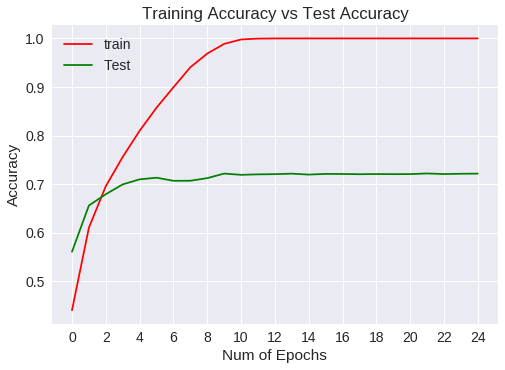

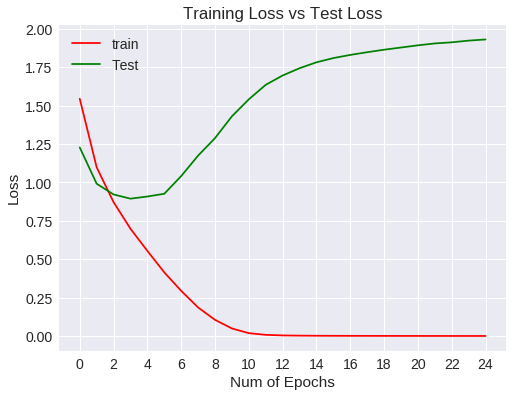

Accuracy: 72.15%
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[766  21  47  19  27   8  10  15  61  26]
 [ 16 835   7  15   3   7  14   6  22  75]
 [ 67   7 604  68  83  65  49  38  10   9]
 [ 26  11  73 559  61 140  59  41  14  16]
 [ 24   4  80  60 674  39  42  63   8   6]
 [  8   6  54 193  47 615  17  50   4   6]
 [  7   8  47  67  31  18 792  11   9  10]
 [ 13   4  31  35  69  53  10 758   7  20]
 [ 58  46  10  13   8   7  13   3 809  33]
 [ 33  83   8  13   6   9   6  10  29 803]]


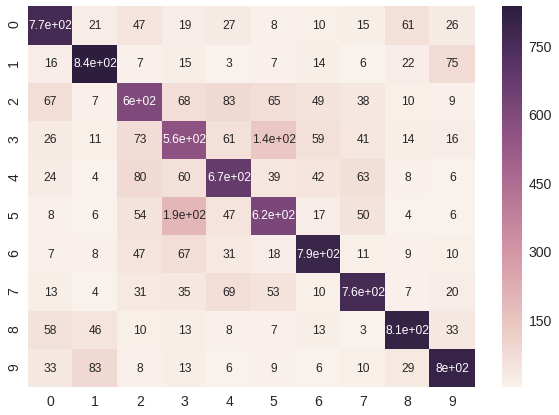

In [17]:
plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, epochs, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Test Accuracy")
plt.legend(['train','Test'])
 
 
plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, epochs, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Test Loss")
plt.legend(['train','Test'])
 
 
plt.show()

scores = cnn_n.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn_n.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()
